# 1. Import packages

In [2]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. A quick example

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


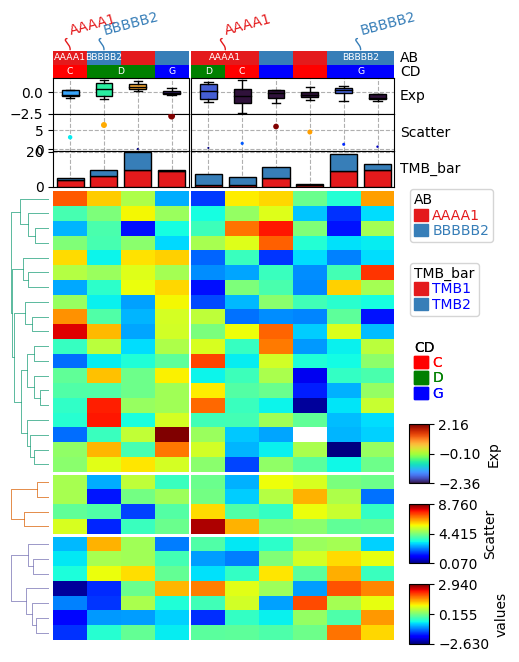

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(5, 7))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True,colors={'C':'red','D':'green','G':'blue'},
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend_kws={'color_text':False,'labelcolor':'blue'}),
                           )
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha, col_split=2, row_split=3, col_split_gap=0.5,
                     row_split_gap=1,label='values',row_dendrogram=True,show_rownames=False,show_colnames=False,
                     tree_kws={'row_cmap': 'Dark2'},
                       legend_gap=5,legend_width=5,legend_hpad=2,legend_vpad=5)
#legend_gap is the gap between two legends, legend_hpad is the horizonal space between legend and heatmap, legend_vpad
# is the verticall space between the first legend and the top of axes (legend_anchor).
# cm.ax_heatmap.set_axis_off()
plt.show()

# 3. Plotting annotations

## 3.1 Only plot the row/column annotation

Starting plotting HeatmapAnnotations


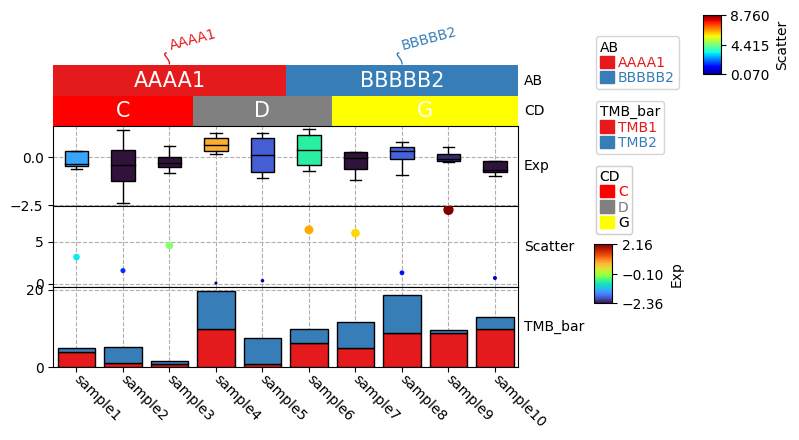

In [4]:
plt.figure(figsize=(6, 4))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=3
                            )
col_ha.show_ticklabels(df.index.tolist())
plt.show()

### anno_label:
anno_label is used to add a text label to the annotatin, parameter `merge` control whether to merge the adjacent labels with the same text, if `merge` != True, then, texts would be draw for each columns. We can also annotate the selected rows/cols using `anno_label`. In the following example, we also set `annot=True` to show the float value for each cell,`linewidths=0.05,linecolor='orange'` can be used to control the line and line color for the boarder between cells.

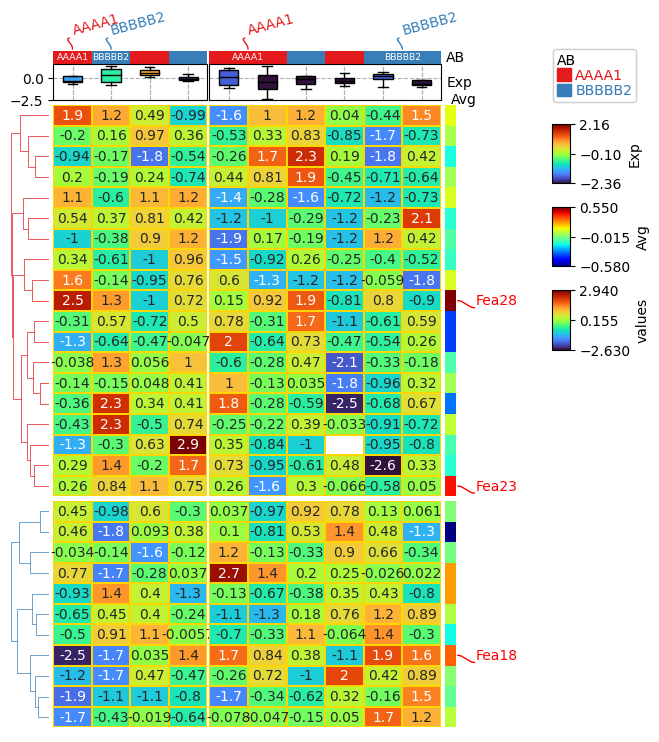

In [5]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.mean() > 0.3 else None,axis=1)
df_rows.name='Selected'

row_ha = HeatmapAnnotation(Avg=anno_simple(df_heatmap.mean(axis=1).apply(lambda x:round(x,2)),
                                           cmap='jet'), #add_text=True,,text_kws={'rotation':0,'fontsize':10,'color':'black'}
                            # Avg=anno_barplot(df_heatmap.mean(axis=1).apply(lambda x:round(x,2)),
                            #                height=10,colors='orangered'),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left'})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=2,row_split=2, col_split_gap=0.5,row_split_gap=1,
                       label='values',row_dendrogram=True,show_rownames=False,show_colnames=False,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='turbo')
plt.show()

### anno_simple:
anno_simple is to draw simple annotatin, cmap for anno_simple can be either categorical (Set1, Dark2, tab10 et.al) or continnuous (jet, turbo, parula).
Parameter add_text control whether to add text on the annotation, if the color and fontsize in text_kws was not specified, the color and fontsize would be determined automatically, for example, if the background color is deep, then the text color would be white, otherwise the text color would be black. The text color can be changed with parameter text_kws={'color':your_color},for example:

Starting plotting HeatmapAnnotations


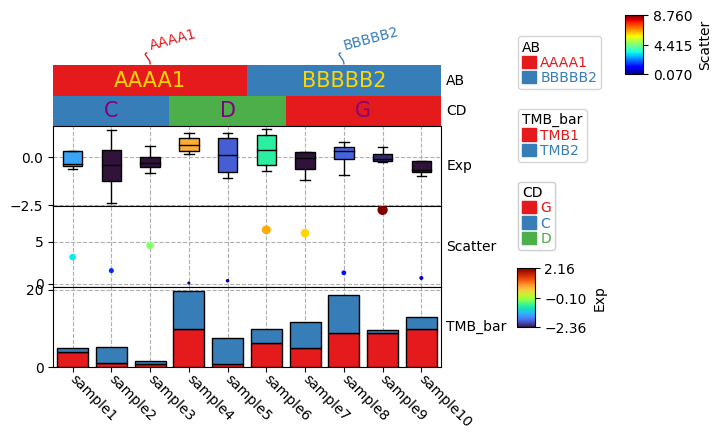

In [6]:
plt.figure(figsize=(5, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'color':'gold'}),
                            CD=anno_simple(df.CD,add_text=True,legend=True,text_kws={'color':'purple'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=5,axis=1)
row_ha.show_ticklabels(df.index.tolist())
plt.show()

### To add a annotation quickly, you just need a dataframe
if df was given, all columns in dataframe df would be treated as a separately anno_simple annotation.

Starting plotting HeatmapAnnotations


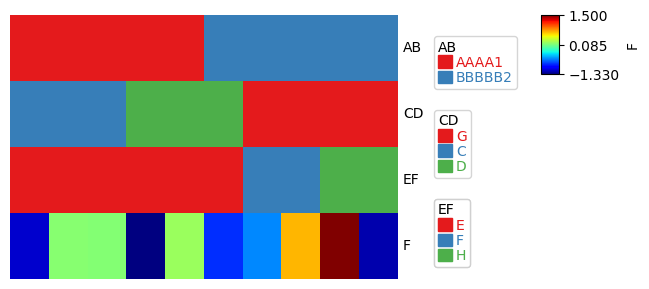

In [7]:
plt.figure(figsize=(5, 3))
row_ha = HeatmapAnnotation(df=df,plot=True,legend=True)
plt.show()

## 3.2 Plot the figure and legend separately
Sometimes, one only want to plot the figure without legend, or plot the legend in a separated pdf, you can do that by giving the parameter plot_legend=False, and plot the legend in another pdf with row_ha.plot_legends

Starting plotting HeatmapAnnotations


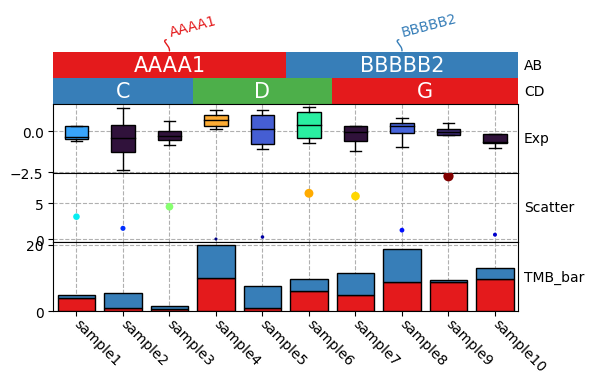

No ax was provided, using plt.gca()


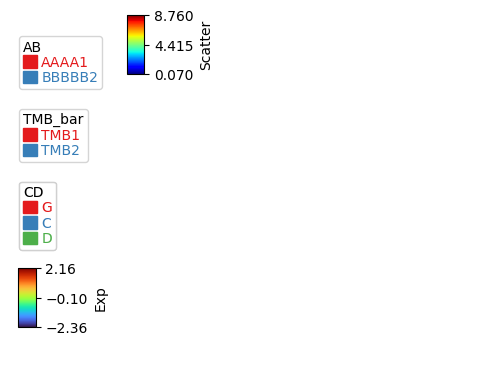

In [8]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,plot_legend=False,
                           legend_gap=5
                            )
row_ha.show_ticklabels(df.index.tolist())
plt.show()

plt.figure()
row_ha.plot_legends()
plt.show()

## 3.3 Top, bottom, left ,right annotations

In [9]:
# Load an example dataset
with open("../data/mammal_array.pkl", 'rb') as f:
    data = pickle.load(f)
df, df_rows, df_cols, col_colors_dict = data

In [10]:
df

,GSM4412025,GSM4412026,GSM4412027,GSM4412028,GSM4412029,GSM4412030,GSM4412031,GSM4412032,GSM4412033,GSM4412034,...,GSM4997945,GSM4997946,GSM4997947,GSM4997948,GSM4997949,GSM4997950,GSM4997951,GSM4997952,GSM4997953,GSM4997954
sheep,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.435033,0.432900,0.446626,0.449123,0.497180,0.515918,0.483706,0.504681,0.529076,0.446443
beluga whale,0.687488,0.694207,0.706525,0.702734,0.687014,0.704003,0.705887,0.693806,0.719417,0.712677,...,0.560381,0.571552,0.610392,0.613619,0.675832,0.668502,0.624820,0.658377,0.702334,0.575034
house mouse,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
vaquita,0.693523,0.702525,0.716792,0.725095,0.711261,0.708651,0.717952,0.705486,0.720915,0.724171,...,0.581862,0.594443,0.628908,0.639457,0.680801,0.707493,0.662338,0.665142,0.751859,0.584952
large flying fox,0.286822,0.269406,0.296796,0.314719,0.305074,0.308419,0.268421,0.297236,0.295019,0.297973,...,0.281684,0.363926,0.367216,0.359392,0.289821,0.257351,0.234301,0.295840,0.249336,0.344848
greater horseshoe bat,0.530606,0.517989,0.520719,0.525855,0.507583,0.511993,0.528107,0.521563,0.542159,0.509526,...,0.735151,0.714805,0.708868,0.738207,0.823604,0.828040,0.823382,0.796882,0.878783,0.693625
little brown bat,0.202525,0.215990,0.238977,0.241872,0.267750,0.236729,0.202384,0.240519,0.251148,0.267257,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_rows

,PredictedTaxid,PredictedSpecies,common_names,Family
sheep,9940.0,ovis_aries_rambouillet,sheep,Bovidae
beluga whale,9749.0,delphinapterus_leucas,beluga whale,Monodontidae
house mouse,10090.0,mus_musculus,house mouse,Muridae
vaquita,42100.0,phocoena_sinus,vaquita,Phocoenidae
large flying fox,132908.0,pteropus_vampyrus,large flying fox,Pteropodidae
greater horseshoe,NaN,NaN,NaN,NaN
bat,59479.0,rhinolophus_ferrumequinum,greater horseshoe bat,Rhinolophidae
little brown bat,59463.0,myotis_lucifugus,little brown bat,Vespertilionidae


In [12]:
df_cols

,GSE,Basename,NCBI_scientific_name,taxid,Tissue,Sex,Family,Order,Species,SuccessRate,common_names
GSM4412025,GSE147003,GSM4412025,Ovis aries,9940,Blood,Female,Bovidae,Artiodactyla,Ovis aries,0.765818,sheep
GSM4412026,GSE147003,GSM4412026,Ovis aries,9940,Blood,Female,Bovidae,Artiodactyla,Ovis aries,0.797669,sheep
GSM4412027,GSE147003,GSM4412027,Ovis aries,9940,Blood,Female,Bovidae,Artiodactyla,Ovis aries,0.759256,sheep
GSM4412028,GSE147003,GSM4412028,Ovis aries,9940,Blood,Male,Bovidae,Artiodactyla,Ovis aries,0.749813,sheep
GSM4412029,GSE147003,GSM4412029,Ovis aries,9940,Blood,Female,Bovidae,Artiodactyla,Ovis aries,0.770433,sheep
...,...,...,...,...,...,...,...,...,...,...,...
GSM4997950,GSE164127,GSM4997950,Eptesicus fuscus,29078,Skin,Male,Vespertilionidae,Chiroptera,Eptesicus fuscus,0.660425,big brown bat
GSM4997951,GSE164127,GSM4997951,Eptesicus fuscus,29078,Skin,Male,Vespertilionidae,Chiroptera,Eptesicus fuscus,0.652822,big brown bat
GSM4997952,GSE164127,GSM4997952,Eptesicus fuscus,29078,Skin,Female,Vespertilionidae,Chiroptera,Eptesicus fuscus,0.664746,big brown bat
GSM4997953,GSE164127,GSM4997953,Eptesicus fuscus,29078,Skin,Male,Vespertilionidae,Chiroptera,Eptesicus fuscus,0.650848,big brown bat


In [13]:
col_colors_dict

{'Tissue': {'#A40043': 'Blood',
  '#00E5FF': 'Brain',
  '#00BECC': 'Cerebellum',
  '#B2F8FF': 'Striatum',
  '#6CBF00': 'Liver',
  '#FFCCEE': 'Muscle',
  '#1E9351': 'Skin'}}

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


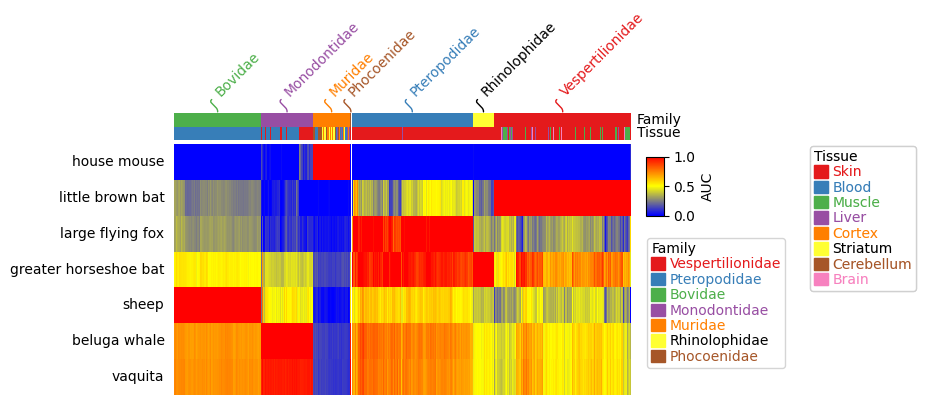

In [14]:
#Put annotations on the top
col_ha = HeatmapAnnotation(label=anno_label(df_cols.Family, merge=True, rotation=45),
                               Family=anno_simple(df_cols.Family, legend=True),
                               Tissue=df_cols.Tissue,label_side='right', axis=1)
plt.figure(figsize=(6, 3.5))
cm = ClusterMapPlotter(data=df, top_annotation=col_ha,
                       show_rownames=True, show_colnames=False,row_names_side='left',
                       col_split=df_cols.Family, cmap='exp1', label='AUC',
                       rasterized=True, legend=True,legend_anchor='ax_heatmap')
#legend_pad control the space between heatmap and legend.
#plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

If you have a very long list of legends, the function will automatically increace another column of legend, for example, in the above plot, there are two columns of legends.

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


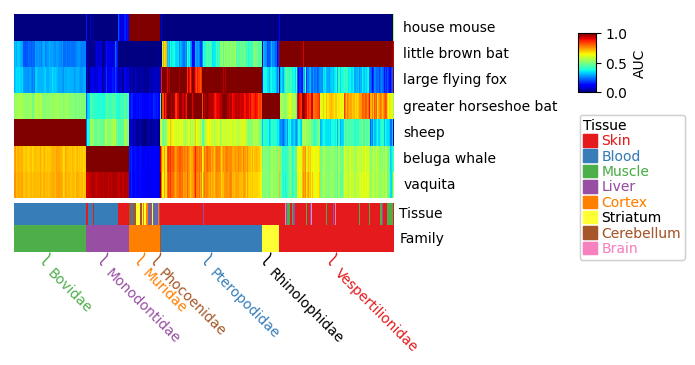

In [15]:
#Put annotations on the bottom
col_ha = HeatmapAnnotation(Tissue=anno_simple(df_cols.Tissue,height=5),
                           Family=anno_simple(df_cols.Family, legend=False,height=6),
                           label=anno_label(df_cols.Family, merge=True,rotation=-45),
                           label_side='right',axis=1)
plt.figure(figsize=(5, 3))
cm = ClusterMapPlotter(data=df, bottom_annotation=col_ha,
                       show_rownames=True, show_colnames=False,row_names_side='right',
                       col_split=df_cols.Family, cmap='jet', label='AUC',
                       rasterized=True, legend=True)
plt.show()

If you want to put the columns annotations on the bottom, then you need to **change the order of HeatmapAnnotation**, `anno_label` should be the **last one** and `anno_label(df_cols.Family)` should be the second last one. When the columns annotation is on the top, the `rotation` of the `anno_label` is 45, but when it is on the bottom, <u>rotation should be -45</u> (rotate to the other direction).<br><br>
In addition, you can change the row labels to the right by setting `row_names_side='right'`. It's worth noting that **the gap betwee the heatmap and the legend could be automatically determined by the code** when you set `row_names_side` to the right.<br><br>
The height of the annotation bar could be changed by the parameter `height` (mm) in `anno_simple` or other kinds of annotation functions.

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


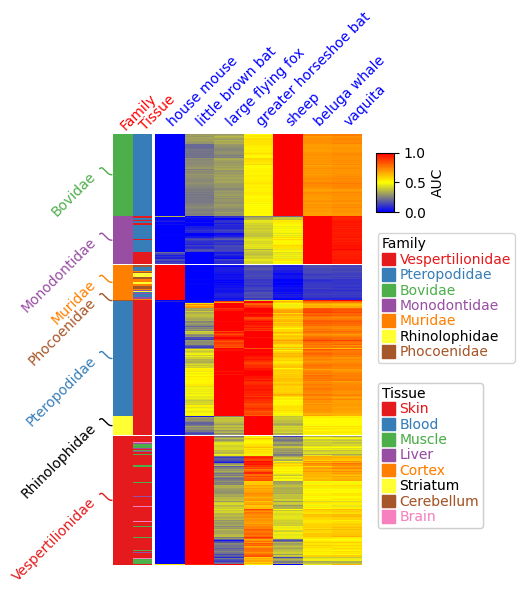

In [16]:
#Put annotations on the left
row_ha = HeatmapAnnotation(label=anno_label(df_cols.Family, merge=True,rotation=45),
                           Family=anno_simple(df_cols.Family, legend=True,height=5),
                           Tissue=anno_simple(df_cols.Tissue,height=5),
                           label_side='top',
                           label_kws={'rotation':45,'rotation_mode':'anchor','color':'red'},
                           axis=0)
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(data=df.T,left_annotation=row_ha,
                       show_rownames=False, show_colnames=True,col_names_side='top',
                       row_split=df_cols.Family, cmap='exp1', label='AUC',
                       rasterized=True, legend=True,
                       xticklabels_kws={'labelrotation':45,'labelcolor':'blue'})
plt.show()

To put annotation on the left in this example, we tranpose the dataframe by useing df.T and use left_annotation. 
We can put the columns labels on the top by set `col_names_side='top'` and use `xticklabels_kws` to change the rotation and color of the columsn labels.<br><br>
We can also change the rotation and color for the annotation labels (for example, `Family` and `Tissue` in this plot) by set `label_kws={'rotation':45,'rotation_mode':'anchor','color':'red'}`.

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


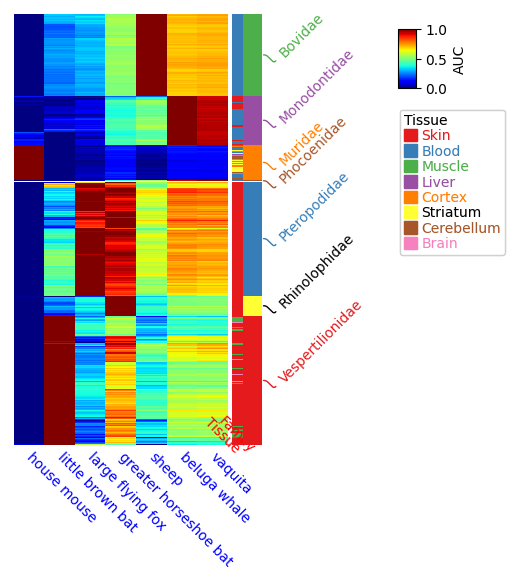

In [17]:
#Put annotation on the right
row_ha = HeatmapAnnotation(Tissue=df_cols.Tissue,
                           Family=anno_simple(df_cols.Family, legend=False,height=5),
                           label=anno_label(df_cols.Family, merge=True,rotation=45),
                           label_side='bottom',
                           label_kws={'rotation':-45,'rotation_mode':'anchor','color':'red'},
                           axis=0)
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(data=df.T,right_annotation=row_ha,
                       show_rownames=False, show_colnames=True,col_names_side='bottom',
                       row_split=df_cols.Family, cmap='jet', label='AUC',
                       rasterized=True, legend=True,
                       xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
#plt.savefig("annotation.pdf", bbox_inches='tight')
plt.show()

# 4. Plotting clustermap and annotation
Here we provided a example dataset in PyComplexHeatmap, let's visualaize it.

In [18]:
import pickle
import urllib
f=open("../data/influence_of_snp_on_beta.pickle",'rb')
data=pickle.load(f)
f.close()
beta,snp,df_row,df_col,col_colors_dict,row_colors_dict=data

In [19]:
# beta is DNA methylation beta values matrix, df_row and df_col are row and columns annotation respectively, col_colors_dict and row_colors_dict are color for annotation
print(beta.iloc[:,list(range(5))].head(5))
print(df_row.head(5))
print(df_col.head(5))
beta=beta.sample(2000)
snp=snp.loc[beta.index.tolist()]
df_row=df_row.loc[beta.index.tolist()]

                 204875570030_R01C02  204875570030_R04C01  \
cg30848532_TC21  0.525089             0.419515              
cg30147375_BC21  0.803776             0.585928              
cg46239718_BC21  0.443958             0.517514              
cg36100119_BC21  0.351977             0.528846              
cg42738582_BC21  0.783958             0.724901              

                 204875570030_R05C01  204875570030_R06C01  204875570035_R05C02  
cg30848532_TC21  0.483276             0.460750             0.390317             
cg30147375_BC21  0.510269             0.831463             0.550146             
cg46239718_BC21  0.535909             0.450167             0.564107             
cg36100119_BC21  0.524896             0.374422             0.551200             
cg42738582_BC21  0.802178             0.848621             0.850481             
                   chr  Target  CpG  ExtensionBase ProbeDesign CON  mapFlag  \
cg30848532_TC21  chr12  1       1    0              II          C   

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


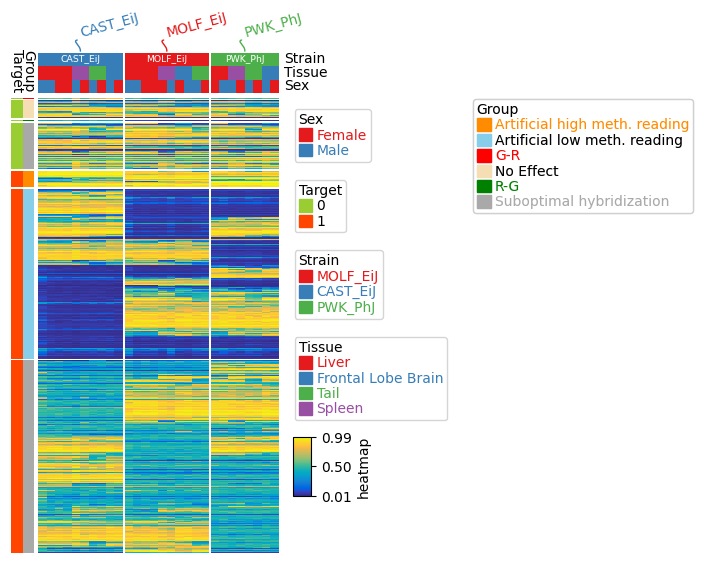

In [20]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target,colors=row_colors_dict['Target'],rasterized=True),
                               Group=anno_simple(df_row.Group,colors=row_colors_dict['Group'],rasterized=True),
                               axis=0)
col_ha= HeatmapAnnotation(label=anno_label(df_col.Strain,merge=True,rotation=15),
                          Strain=anno_simple(df_col.Strain,add_text=True),
                          Tissue=df_col.Tissue,Sex=df_col.Sex,axis=1)
plt.figure(figsize=(3.5, 6))
cm = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     row_split=df_row.loc[:, ['Target', 'Group']],
                     col_split=df_col['Strain'],cmap='parula',
                     rasterized=True,row_split_gap=1,legend=True,legend_anchor='ax_heatmap',legend_vpad=5)
#plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

## Key features:
Users can split the columns and rows into multiple subgroups by giving row_split and col_split,
row_split and col_split can be number of pandas dataframe or Series.

# 5. Composite multiple heatmap horizontally or vertically

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting..
Plotting matrix..
Starting plotting HeatmapAnnotations


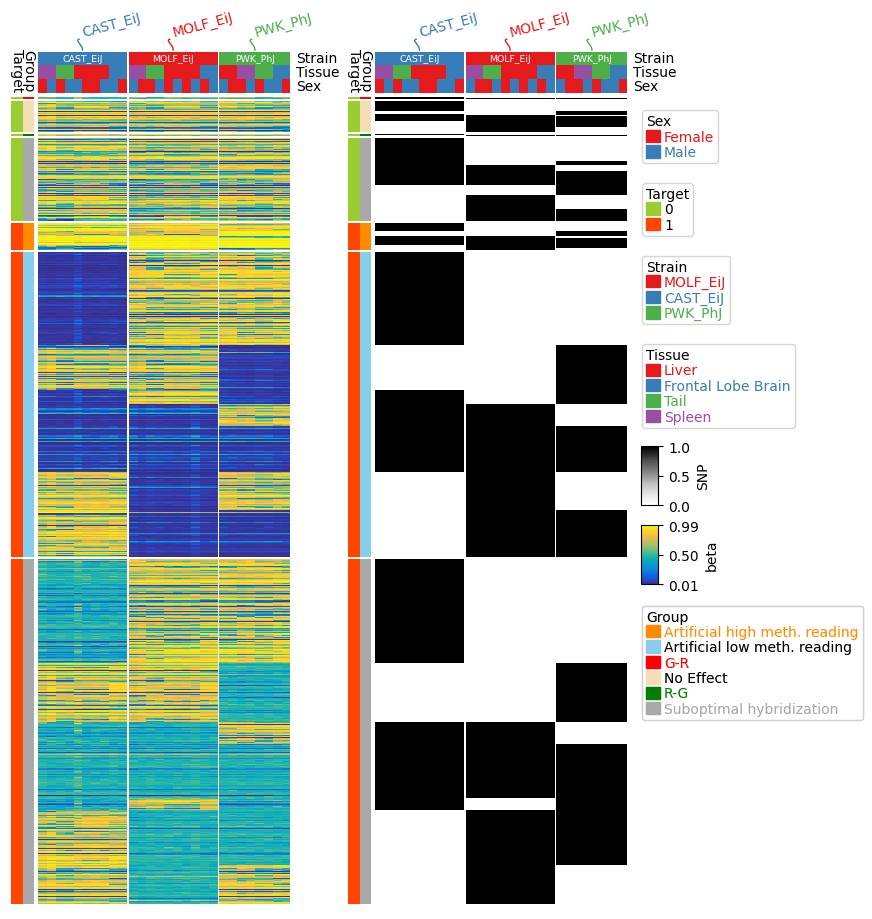

In [21]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target, colors=row_colors_dict['Target'], rasterized=True),
                               Group=anno_simple(df_row.Group, colors=row_colors_dict['Group'], rasterized=True),
                               axis=0)
col_ha = HeatmapAnnotation(label=anno_label(df_col.Strain, merge=True, rotation=15),
                           Strain=anno_simple(df_col.Strain, add_text=True),
                           Tissue=df_col.Tissue, Sex=df_col.Sex,
                           axis=1,verbose=0)  # df=df_col.loc[:,['Strain','Tissue','Sex']]

cm1 = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                       show_rownames=False, show_colnames=False,
                       row_dendrogram=False, col_dendrogram=False,
                       row_split=df_row.loc[:, ['Target', 'Group']],
                       col_split=df_col['Strain'], cmap='parula',
                       rasterized=True, row_split_gap=1, legend=True,
                        plot=False,label='beta')

cm2 = ClusterMapPlotter(data=snp, top_annotation=col_ha, left_annotation=row_ha,
                        show_rownames=False, show_colnames=False,
                        row_dendrogram=False, col_dendrogram=False,
                        col_cluster_method='ward',row_cluster_method='ward',
                        col_cluster_metric='jaccard',row_cluster_metric='jaccard',
                        row_split=df_row.loc[:, ['Target', 'Group']],
                        col_split=df_col['Strain'],
                        rasterized=True, row_split_gap=1, legend=True,
                        plot=False,cmap='Greys',label='SNP')

cmlist=[cm1,cm2]

plt.figure(figsize=(8,10))
composite(cmlist=cmlist, main=1,legend_hpad=2,legend_y=0.8)
#plt.savefig("beta_snp.pdf", bbox_inches='tight')
plt.show()